In [17]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data() #train과 test set으로 나눠진다.

# Normalize

#### 현재 x값들은 min: 0, max: 255 사이의 값을 가진다. 255로 나눠 0~1의 범위의 값을 갖도록 한다.

In [18]:
x_train, x_test = x_train / 255.0, x_test / 255.0 # normalize

In [19]:
x_train.shape # 28*28 pixcel??

(60000, 28, 28)

In [20]:
y_train.shape
#x_test 개수 = y_test개수, x_train 개수 = y_train 개수

(60000,)

## Target 값(숫자 0~9 class)

In [21]:
for a in range(10):
    print(y_train[a]) #target값

5
0
4
1
9
2
1
3
1
4


## 데이터값 -> plot

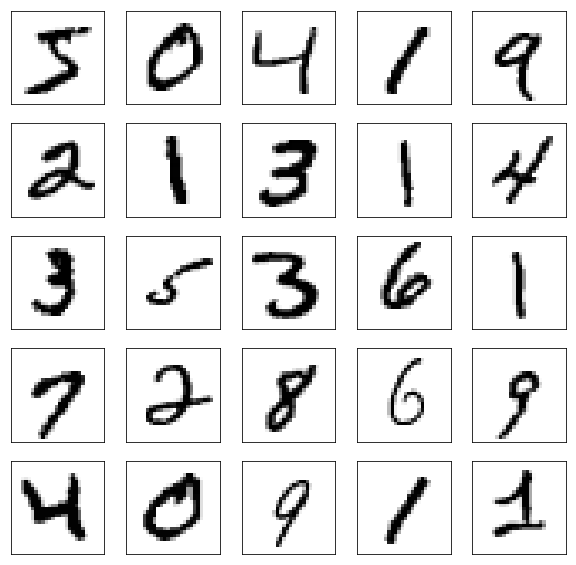

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

#### xticks의 인수를 공집합으로 주어서 x축이 표시되지 않게 함
#### x, y값 각각 0~27, 28개의 범위의 값을 가짐

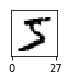

In [23]:
plt.figure(figsize=(10,10))
for i in range(1):
    plt.subplot(10,10,i+1)
    plt.xticks([0,27])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary) #cmap=plt.cm.binary??
plt.show()

#### Flatten: input은 이미지로, 28 by 28 matrix인데 layer의 노드는 vector이다. 28*28로 쭉 이어서  matrix -> vector(1*784)
#### Dense : 노드 512+1 = 513개, relu 설정
## Dropout: 입력된 퍼센트값에 맞는 비율로 노드 간 연결을 끊는다(화살표를 끊는다)
#### Dense: output layer 노드 10개? 11개? softmax로 해서 classification으로 바꿔준다

In [24]:
img_rows = 28
img_cols = 28

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(img_rows, img_cols)), 
    #input layer의 노드 수는 28*28 (!! 28*28+1 아님! input layer라서 아님!) =>?????????
  tf.keras.layers.Dense(512, activation=tf.nn.relu), # relu
  tf.keras.layers.Dropout(0.2), 
    # Dropout 0보다 크고 1보다 작은 수를 넣는다. 화살표를 자른다. 모든 화살표들 중 20%를 자른다.
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
    # softmax
    #output layer의 노드 수는 10개 class의 개수와 일치
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
# Take a look at the model summary
model.summary()
# 785(784+1) * 512 = 401920
# 5130 = 513(512+1) * 10

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs=1) # acc 표시됨
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 166us/sample - loss: 0.1029 - acc: 0.9682


[0.10286968237534165, 0.9682]

In [7]:
from IPython.display import HTML

In [8]:
input_form = """

<table>

<td style="border-style: none;">

<div style="border: solid 2px #666; width: 143px; height: 144px;">

<canvas width="140" height="140"></canvas>

</div></td>

<td style="border-style: none;">

<button onclick="clear_value()">Clear</button>

</td>

</table>

"""



javascript = """

<script type="text/Javascript">

    var pixels = [];

    for (var i = 0; i < 28*28; i++) pixels[i] = 0

    var click = 0;



    var canvas = document.querySelector("canvas");

    canvas.addEventListener("mousemove", function(e){

        if (e.buttons == 1) {

            click = 1;

            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";

            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);

            x = Math.floor(e.offsetY * 0.2)

            y = Math.floor(e.offsetX * 0.2) + 1

            for (var dy = 0; dy < 2; dy++){

                for (var dx = 0; dx < 2; dx++){

                    if ((x + dx < 28) && (y + dy < 28)){

                        pixels[(y+dy)+(x+dx)*28] = 1

                    }

                }

            }

        } else {

            if (click == 1) set_value()

            click = 0;

        }

    });

    

    function set_value(){

        var result = ""

        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","

        var kernel = IPython.notebook.kernel;

        kernel.execute("image = [" + result + "]");

    }

    

    function clear_value(){

        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";

        canvas.getContext("2d").fillRect(0, 0, 140, 140);

        for (var i = 0; i < 28*28; i++) pixels[i] = 0

    }

</script>

"""

In [13]:
HTML(input_form + javascript)

<BarContainer object of 10 artists>

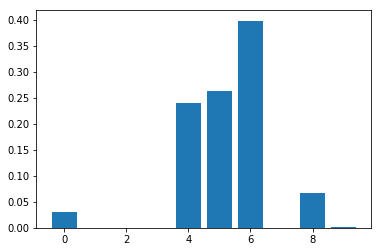

In [27]:
image_3darray = np.array(image).reshape([1,img_rows,img_cols])
result = model.predict(image_3darray)
plt.bar(list(range(10)), list(result.reshape([10])))

In [39]:
28 * 28

784